In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [42]:
%load_ext pycodestyle_magic

In [43]:
%pycodestyle_on

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [45]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import tensorflow as tf

In [93]:
df = pd.read_csv("Stats.csv", index_col=0)

In [94]:
df

,Rating,Accuracy,Shot fired,Hits,Deaths,DMG_Get
0,70.8,20.10%,3509,704,40,464
1,55.8,15.80%,4771,753,54,591
2,47.6,16.70%,3526,589,59,549
3,47.5,15.20%,3184,484,42,442
4,24.7,10.30%,3481,359,66,583
...,...,...,...,...,...,...
1845,26.4,3.20%,1393,44,0,58
1846,21.1,6.40%,1643,105,11,186
1847,20.9,3.60%,2208,80,5,136
1848,19.9,1.90%,1630,31,2,53


In [95]:
len(df)

1850

In [96]:
df = df[1:]

In [97]:
def proc(acc):
    acc = acc[:-1]
    return acc

In [98]:
df["Accuracy"] = df["Accuracy"].apply(proc).apply(float)

C:\Users\kacpe\AppData\Local\Temp/ipykernel_26152/1612334256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Accuracy"] = df["Accuracy"].apply(proc).apply(float)


In [99]:
df[df["DMG_Get"] == 'Rating']

,Rating,Accuracy,Shot fired,Hits,Deaths,DMG_Get
1714,49.5,18.4,2143,394,75,Rating


In [100]:
df = df.drop(1714)

In [101]:
df["DMG_Get"] = df["DMG_Get"].apply(proc).apply(float)

In [102]:
# sns.pairplot(df)

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X = df.drop("Rating", axis=1)
y = df["Rating"]

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=110)

1:80: E501 line too long (90 > 79 characters)


In [106]:
scaler = StandardScaler()

In [107]:
X_train = scaler.fit_transform(X_train)

In [108]:
X_test = scaler.transform(X_test)

In [109]:
X_train.shape

(1478, 5)

In [110]:
X_test.shape

(370, 5)

In [111]:
# Deep Learining

In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [113]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mae')

In [114]:
model.fit(x=X_train, y=y_train.values,
          validation_data=(X_test, y_test.values),
          batch_size=128, epochs=400)

In [115]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

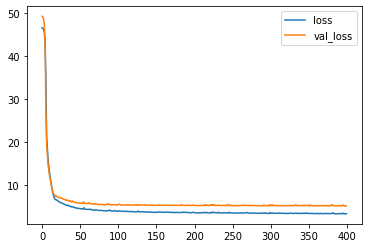

In [116]:
losses.plot()

In [117]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

1:47: E231 missing whitespace after ','
1:67: E231 missing whitespace after ','
1:80: E501 line too long (91 > 79 characters)


In [120]:
predictions = model.predict(X_test)

In [121]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [125]:
# Much better
# Error is 2 times smaller and Neuron Model copes better with outliers

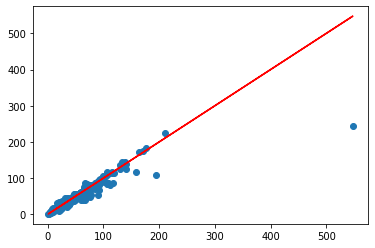

In [127]:
# Our predictions
plt.scatter(y_test, predictions)

# Real Value
plt.plot(y_test, y_test, 'r')

In [129]:
# Project Output

In [132]:
y_test.values.reshape(len(X_test))
df1 = pd.DataFrame(y_test.values.reshape(len(X_test), 1))
df2 = pd.DataFrame(predictions)
df3 = pd.DataFrame(X_test)
df12 = pd.concat([df1, df2], axis=1)

In [133]:
data = pd.DataFrame(X_test)
data = data.reset_index()
data = data.drop("index", axis=1)
data

,0,1,2,3,4
0,-1.456428,-0.700610,-1.109806,-1.187049,-1.094865
1,-0.032130,0.049880,0.030202,-0.777043,-0.502157
2,0.615279,0.108071,0.506408,-1.323717,-1.035594
3,-0.792834,1.071642,0.049442,-0.367038,-0.265074
4,-0.695723,-0.994987,-0.970312,-0.002589,-0.442886
...,...,...,...,...,...
365,2.136689,-0.306967,0.896031,0.999646,0.386904
366,1.084650,-0.492664,0.126405,-1.141492,-0.798511
367,0.048797,0.573597,0.501598,0.179635,0.209092
368,0.793316,-0.984718,-0.527777,0.270748,-0.027991


In [137]:
final = pd.concat([data, df12], axis=1)
final.columns = ['Accuracy', 'Shot fired', 'Hits', 'Deaths', "DMG_Get", 'Rating', "Predictions"]
final.drop(['Accuracy', 'Shot fired', 'Hits', 'Deaths', "DMG_Get"], axis=1, inplace=True)
final

,Rating,Predictions
0,16.3,16.852171
1,53.0,51.530102
2,118.3,114.583740
3,41.9,41.847706
4,19.0,18.396633
...,...,...
365,116.3,85.682922
366,79.3,76.678047
367,62.0,46.507378
368,26.4,31.642897


2:80: E501 line too long (96 > 79 characters)
3:80: E501 line too long (89 > 79 characters)


In [138]:
final["Diff"] = final["Rating"] - final["Predictions"]

In [139]:
final

,Rating,Predictions,Diff
0,16.3,16.852171,-0.552171
1,53.0,51.530102,1.469898
2,118.3,114.583740,3.716260
3,41.9,41.847706,0.052294
4,19.0,18.396633,0.603367
...,...,...,...
365,116.3,85.682922,30.617078
366,79.3,76.678047,2.621953
367,62.0,46.507378,15.492622
368,26.4,31.642897,-5.242897


In [140]:
len(final[abs(final["Diff"]) < 5]) / len(final) * 100

74.05405405405405

# Without Outlaiers

In [141]:
df_100 = df[df["Rating"] < 100]

In [142]:
df_100

,Rating,Accuracy,Shot fired,Hits,Deaths,DMG_Get
1,55.8,15.8,4771,753,54,59.0
2,47.6,16.7,3526,589,59,54.0
3,47.5,15.2,3184,484,42,44.0
4,24.7,10.3,3481,359,66,58.0
5,24.4,14.5,2365,343,68,60.0
...,...,...,...,...,...,...
1845,26.4,3.2,1393,44,0,5.0
1846,21.1,6.4,1643,105,11,18.0
1847,20.9,3.6,2208,80,5,13.0
1848,19.9,1.9,1630,31,2,5.0


In [146]:
X = df_100.drop("Rating", axis=1)

In [147]:
X

,Accuracy,Shot fired,Hits,Deaths,DMG_Get
1,15.8,4771,753,54,59.0
2,16.7,3526,589,59,54.0
3,15.2,3184,484,42,44.0
4,10.3,3481,359,66,58.0
5,14.5,2365,343,68,60.0
...,...,...,...,...,...
1845,3.2,1393,44,0,5.0
1846,6.4,1643,105,11,18.0
1847,3.6,2208,80,5,13.0
1848,1.9,1630,31,2,5.0


In [148]:
y = df_100["Rating"]

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=110)

1:80: E501 line too long (90 > 79 characters)


In [150]:
X_test.to_csv("data/X_test_ann.csv", encoding="utf-8")
y_test.to_csv("data/y_test_ann.csv", encoding="utf-8")
X_train.to_csv("data/X_train_ann.csv", encoding="utf-8")
y_train.to_csv("data/y_train_ann.csv", encoding="utf-8")

In [151]:
X_train

,Accuracy,Shot fired,Hits,Deaths,DMG_Get
582,18.9,1169,221,53,44.0
1727,17.3,4283,740,30,33.0
213,16.1,1405,226,30,27.0
268,15.5,930,144,25,22.0
69,16.7,2140,357,35,33.0
...,...,...,...,...,...
463,10.0,667,67,27,17.0
410,15.2,1587,242,53,37.0
1385,14.5,3658,531,39,45.0
65,15.8,3220,509,36,38.0


In [152]:
scaler = MinMaxScaler()

In [153]:
X_train = scaler.fit_transform(X_train)

In [154]:
X_test = scaler.transform(X_test)

In [155]:
X_test_df = pd.DataFrame(X_test)

In [156]:
y_test_df = pd.DataFrame(y_test)

In [157]:
X_test_df.columns = ['Accuracy', 'Shot fired', 'Hits', 'Deaths', 'DMG_Get']

In [158]:
y_test_df.columns

Index(['Rating'], dtype='object')

In [159]:
model.fit(x=X_train, y=y_train.values,
          validation_data=(X_test, y_test.values),
          batch_size=128, epochs=400)

1:20: E231 missing whitespace after ','
2:34: E231 missing whitespace after ','
3:25: E231 missing whitespace after ','


In [162]:
predictions = model.predict(X_test)

In [163]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [164]:
df.head(1)

,Rating,Accuracy,Shot fired,Hits,Deaths,DMG_Get
1,55.8,15.8,4771,753,54,59.0


In [166]:
to_predict = [[15.8, 4771, 753, 54, 591]]

In [167]:
to_predict_s = scaler.transform(to_predict)

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [168]:
to_predict_s

array([[0.34899329, 0.57465619, 0.50436535, 0.39705882, 5.7184466 ]])

In [169]:
pred = model.predict(to_predict_s)

In [170]:
pred

array([[2.1469371]], dtype=float32)

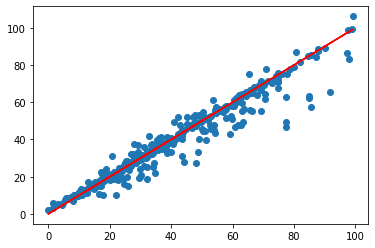

In [203]:
plt.scatter(y_test, predictions)

# Real Value
plt.plot(y_test, y_test, 'r')

In [204]:
tf.keras.models.save_model(model, "models/ann.hdf5")

In [205]:
len(X_test_df)

347

In [206]:
X_test_df.to_csv("data/X_test.csv", encoding="utf-8")
y_test_df.to_csv("data/y_test.csv", encoding="utf-8")

# Cheated ANN

In [207]:
X = df_100[["Accuracy", "Hits", "DMG_Get"]]

In [208]:
y = df_100["Rating"]

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=110)

1:80: E501 line too long (90 > 79 characters)


In [210]:
X_test.to_csv("data/X_test_ann_3.csv", encoding="utf-8")
y_test.to_csv("data/y_test_ann_3.csv", encoding="utf-8")
X_train.to_csv("data/X_train_ann_3.csv", encoding="utf-8")
y_train.to_csv("data/y_train_ann_3.csv", encoding="utf-8")

In [211]:
X_train = scaler.fit_transform(X_train)

In [212]:
X_test = scaler.transform(X_test)

In [213]:
X_test_df = pd.DataFrame(X_test)

In [214]:
y_test_df = pd.DataFrame(y_test)

In [215]:
X_test_df.columns = ['Accuracy', 'Hits', 'DMG_Get']

In [216]:
model_3 = Sequential()

model_3.add(Dense(19, activation='relu'))
model_3.add(Dense(19, activation='relu'))
model_3.add(Dense(19, activation='relu'))
model_3.add(Dense(19, activation='relu'))
model_3.add(Dense(19, activation='relu'))
model_3.add(Dense(19, activation='relu'))
model_3.add(Dense(19, activation='relu'))
model_3.add(Dense(19, activation='relu'))
model_3.add(Dense(19, activation='relu'))
model_3.add(Dense(19, activation='relu'))
model_3.add(Dense(19, activation='relu'))

model_3.add(Dense(1))

model_3.compile(optimizer='adam', loss='mae')

In [226]:
model_3.fit(x=X_train, y=y_train.values,
            validation_data=(X_test, y_test.values),
            batch_size=128, epochs=400)

In [218]:
predictions = model_3.predict(X_test)

In [219]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

In [220]:
tf.keras.models.save_model(model_3, "models/ann_3.hdf5")

In [221]:
X_test_df.to_csv("data/X_test_3.csv", encoding="utf-8")
y_test_df.to_csv("data/y_test_3.csv", encoding="utf-8")

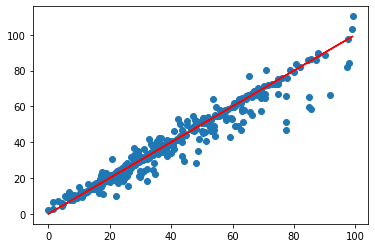

In [222]:
plt.scatter(y_test, predictions)

# Real Value
plt.plot(y_test, y_test, 'r')